In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv")

In [5]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols] 
y = pima.Outcome 

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 


In [8]:

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


In [9]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6883116883116883
Precision: 0.5866666666666667
Recall: 0.5176470588235295
F1 Score: 0.55


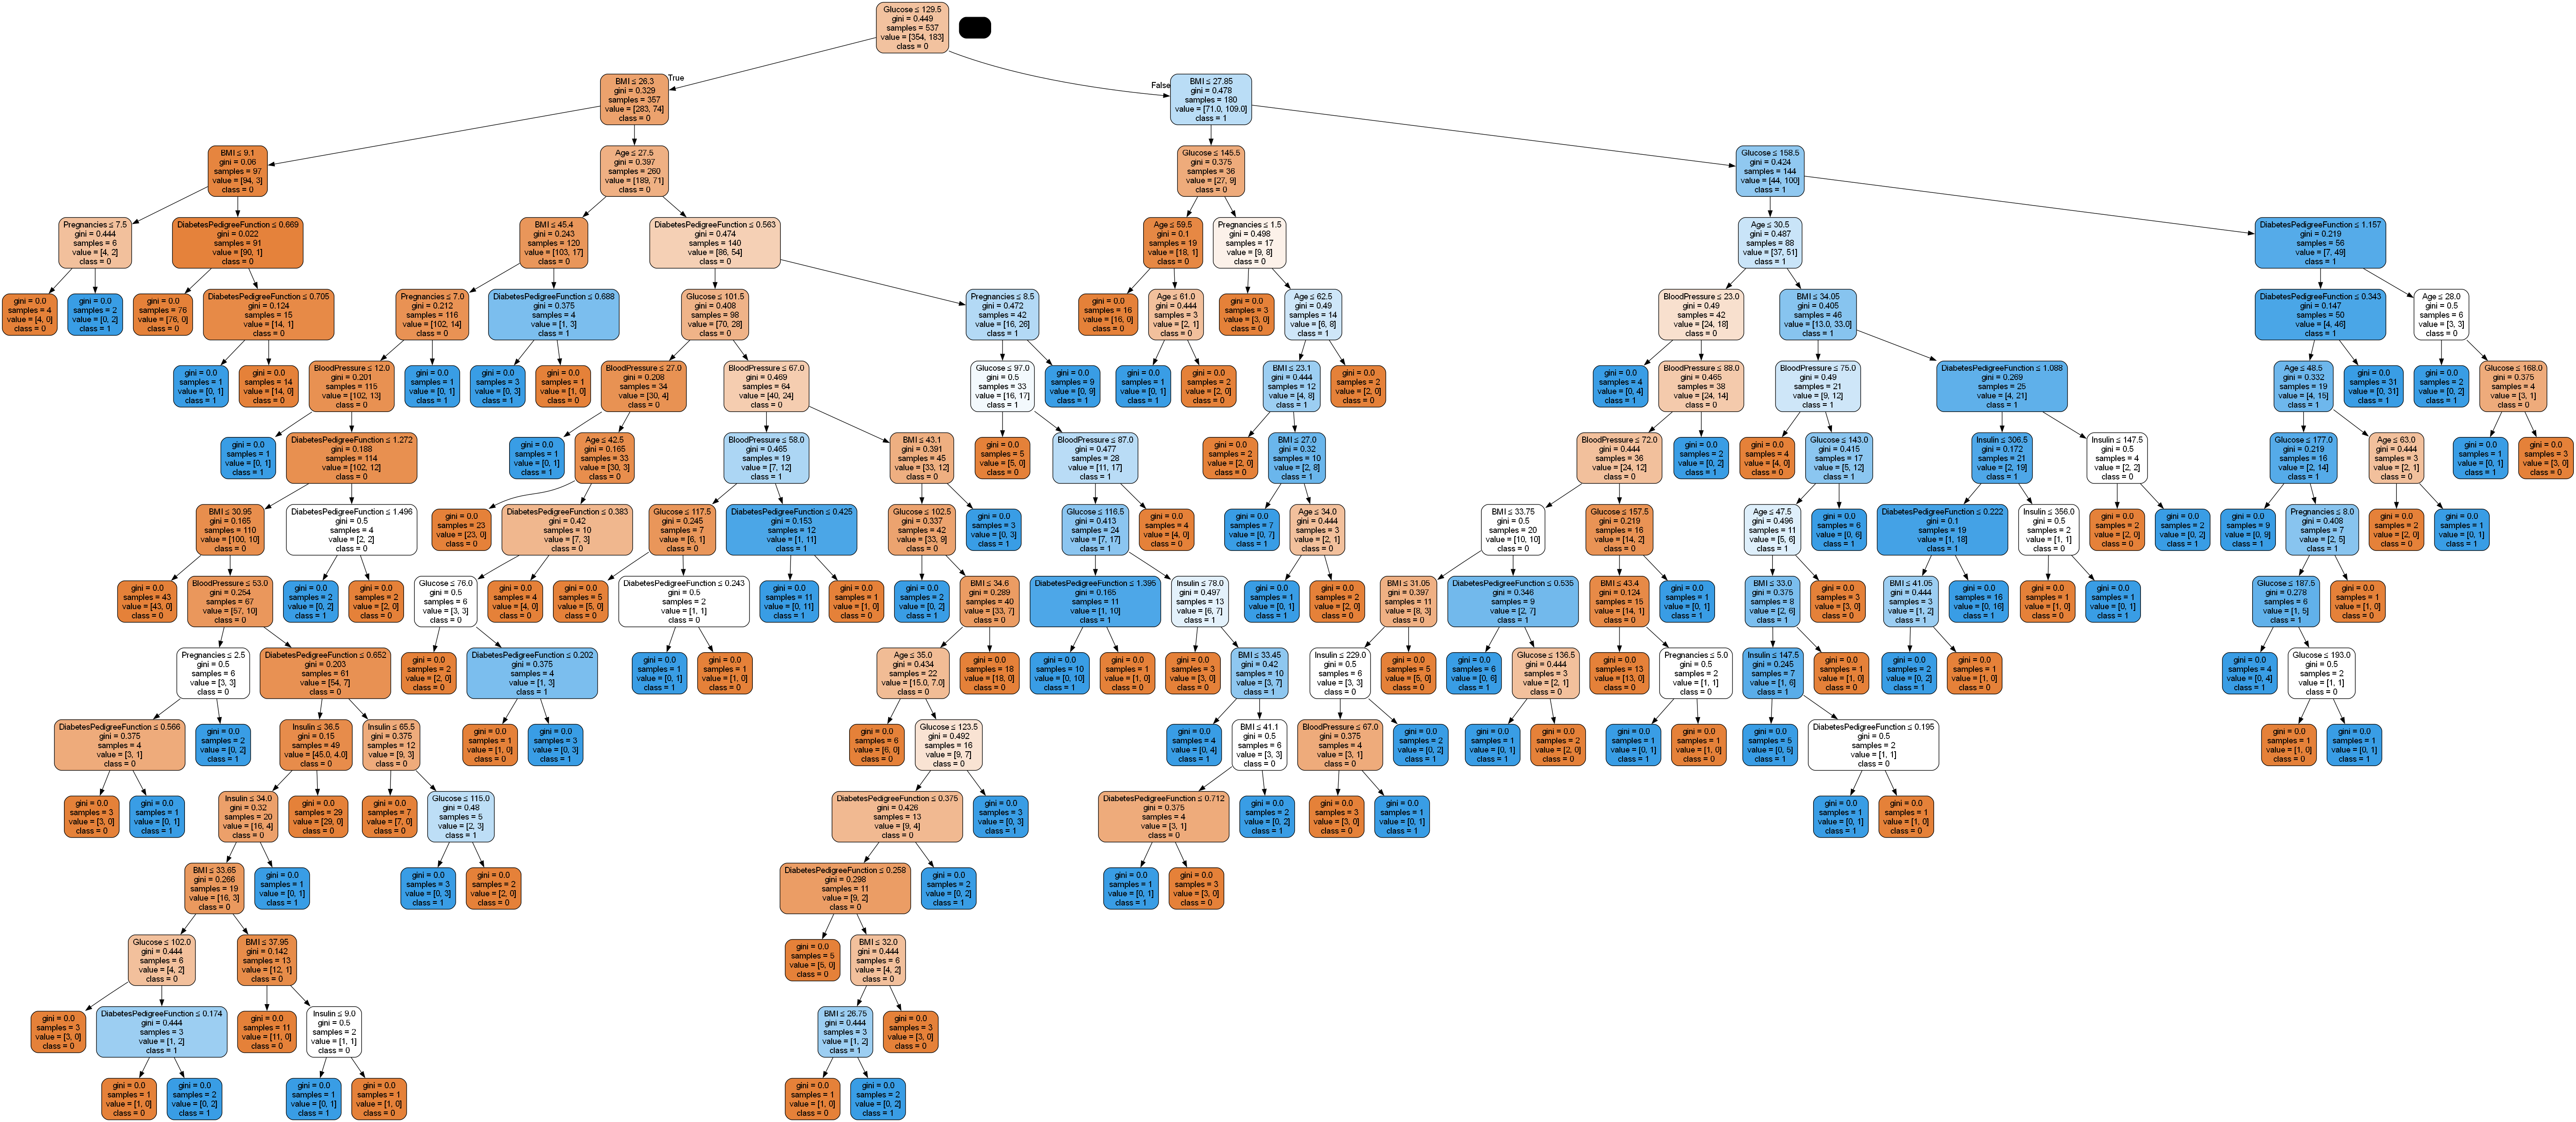

In [10]:
from sklearn.tree import export_graphviz
from io import StringIO   # ✅ updated import
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')

Image(graph.create_png())


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


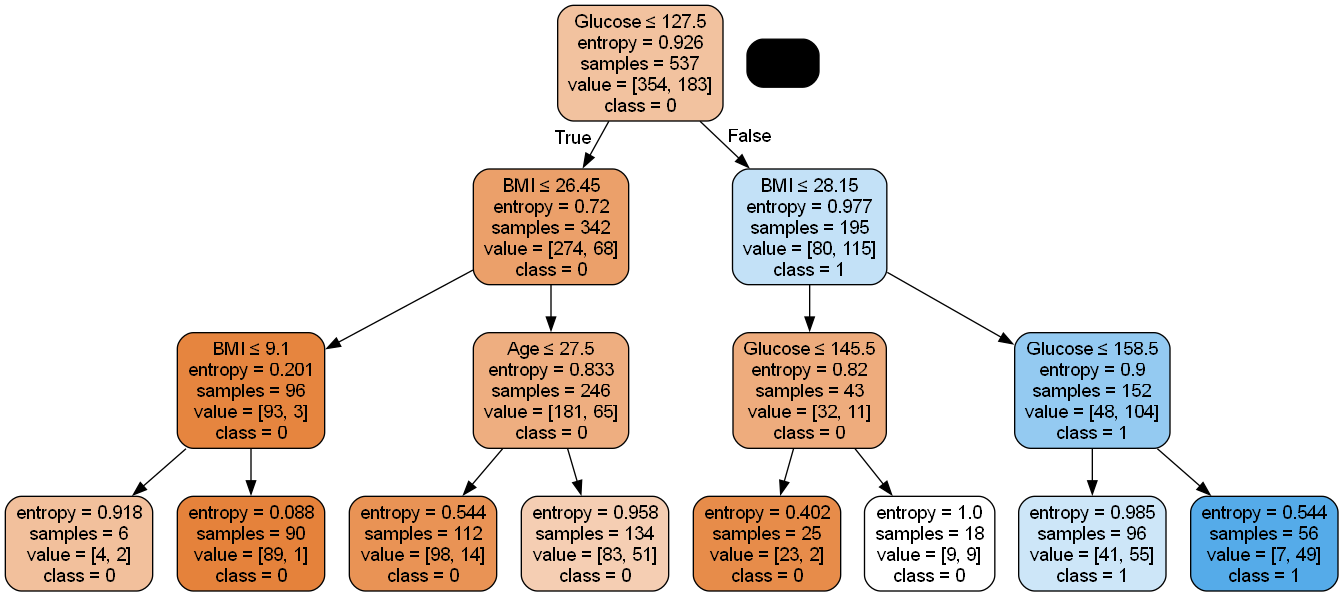

In [12]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=['0', '1']
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())